In [1]:
import cooler
import kmedoids

import numpy as np
import seaborn as sb
import cooltools.lib.plotting
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

In [2]:
# variables
resolution = 128000
region = 'chr4'  # {chrom}:{start}-{end}, unit prefixes k, M, G are supported

In [3]:
# path to data files
wt = "/home/elinfi/coolers/HiC_wt_001.mcool"
cancer = "/home/elinfi/coolers/HiC_cancer_001.mcool"

In [4]:
# cooler object for given resolution
clr_wt = cooler.Cooler(wt + '::resolutions/' + str(resolution))
clr_cancer = cooler.Cooler(cancer + '::resolutions/' + str(resolution))

# get raw data for given region
wt_raw = clr_wt.matrix(balance=False).fetch(region)
cancer_raw = clr_cancer.matrix(balance=False).fetch(region)

# get balanced data for given region
wt_balanced = clr_wt.matrix(balance=True).fetch(region)
cancer_balanced = clr_cancer.matrix(balance=True).fetch(region)



In [5]:
small = np.sum(cancer_raw == 0)
maks = np.nanmax(cancer_balanced)
num_elems = 2973*2973
small

344381

In [6]:
# globally set font sizes
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


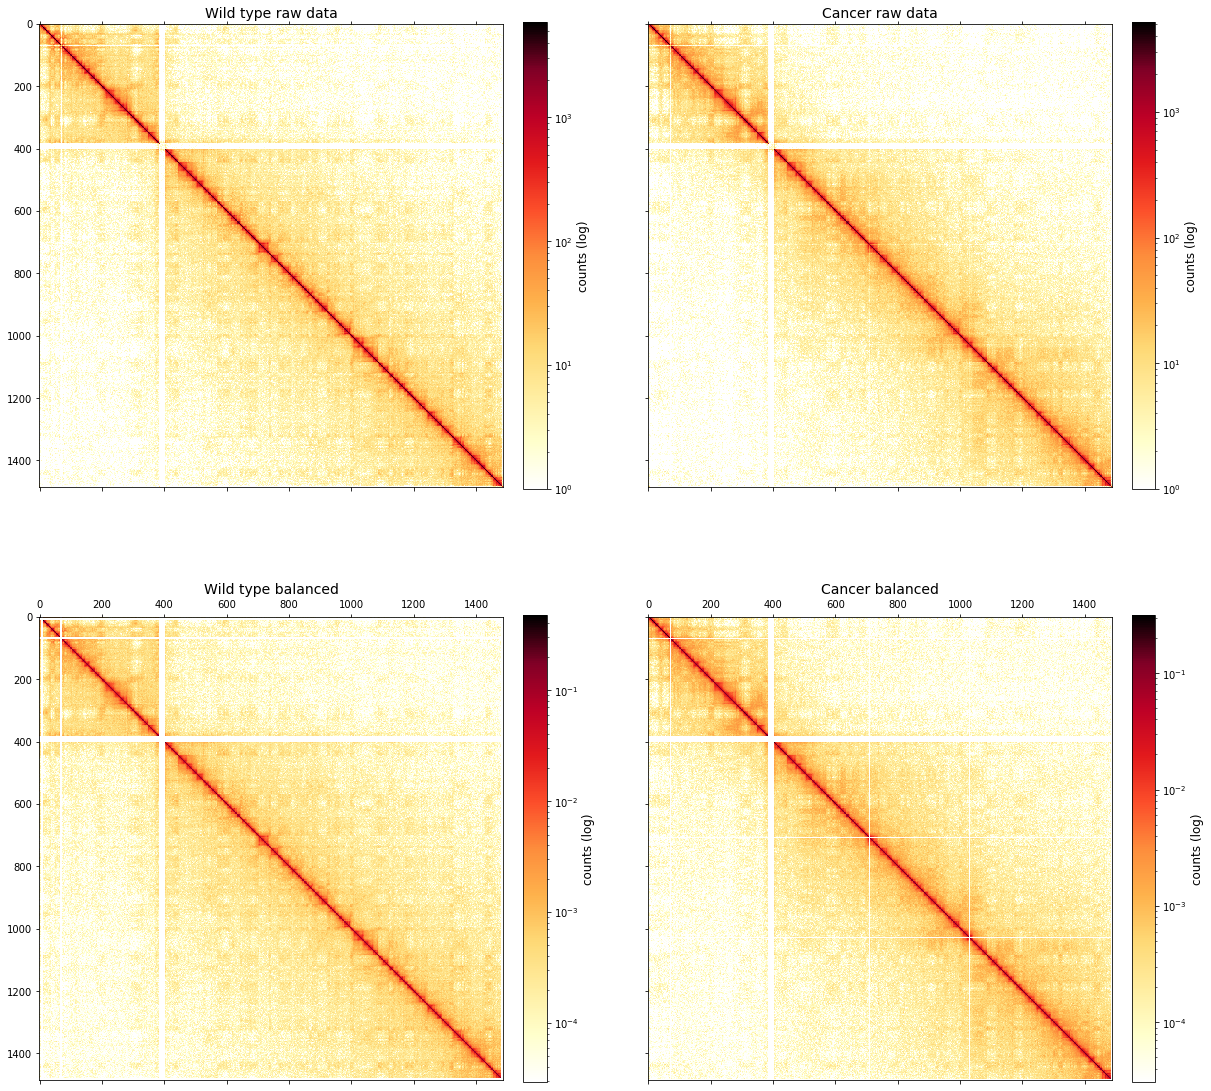

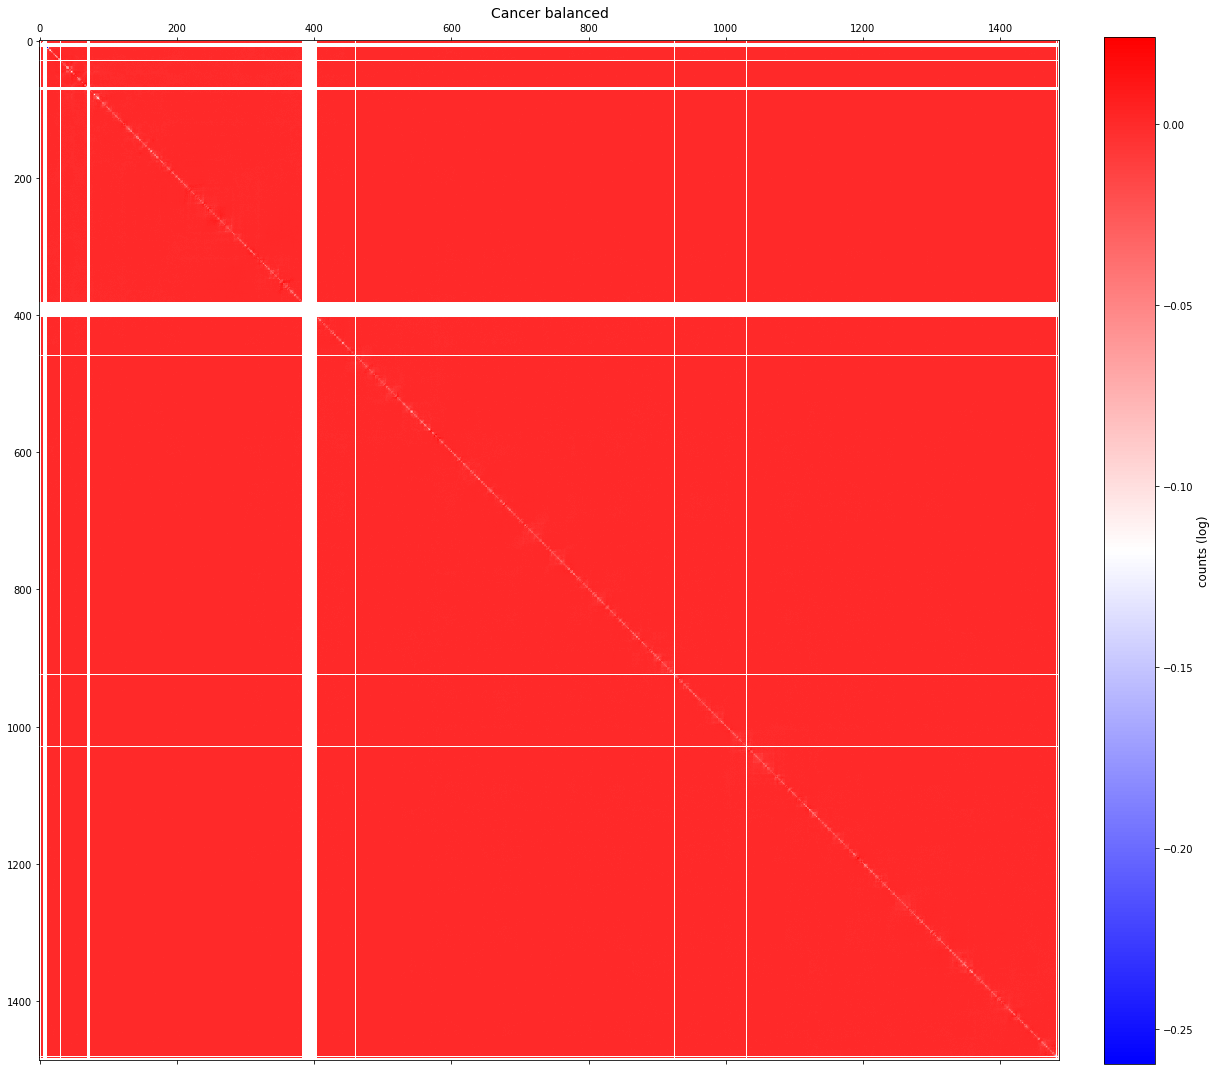

In [16]:
f, axs = plt.subplots(figsize=(20, 20),
                      nrows=2,
                      ncols = 2,
                      sharex=True, sharey=True)

ax = axs[0, 0]
im = ax.matshow(wt_raw,
                norm=LogNorm(),
                cmap='fall')
plt.colorbar(im, fraction=0.046, pad=0.04, label='counts (log)', ax=ax)
ax.set(title='Wild type raw data')

ax = axs[1, 0]
im = ax.matshow(wt_balanced,
                norm=LogNorm(),
                cmap='fall')
plt.colorbar(im, fraction=0.046, pad=0.04, label='counts (log)', ax=ax)
ax.set(title='Wild type balanced')

ax = axs[0, 1]
im = ax.matshow(cancer_raw,
                norm=LogNorm(),
                cmap='fall')
plt.colorbar(im, fraction=0.046, pad=0.04, label='counts (log)', ax=ax)
ax.set(title='Cancer raw data')

ax = axs[1, 1]
im = ax.matshow(cancer_balanced,
                norm=LogNorm(),
                cmap='fall')
plt.colorbar(im, fraction=0.046, pad=0.04, label='counts (log)', ax=ax)
ax.set(title='Cancer balanced')

f, axs = plt.subplots(figsize=(20, 20),
                      nrows=1,
                      ncols = 1,
                      sharex=True, sharey=True)
ax = axs
im = ax.matshow(cancer_balanced - wt_balanced,
                cmap='bwr')
plt.colorbar(im, fraction=0.046, pad=0.04, label='counts (log)', ax=ax)
ax.set(title='Cancer balanced')
plt.savefig('test.png')

In [8]:
# get the difference between datasets by dividision
diff = np.divide(wt_balanced, cancer_balanced)

# get the sum of the data sets
sum_balanced = wt_balanced + cancer_balanced
sub_balanced = wt_balanced - cancer_balanced
sub_raw = wt_raw - cancer_raw
zero_zero = sum_balanced == 0
test = sub_raw[np.isinf(diff)]
print(np.sum(cancer_raw > 5))
print(np.max(test))
print(np.sum(zero_zero))

print(np.sum(np.isinf(diff)))
print(np.sum(np.isnan(diff)))
diff[zero_zero] = 1
print(np.sum(np.isinf(diff)))
print(np.sum(np.isnan(diff)))
print(np.sum(np.isnan(wt_balanced) + np.isnan(cancer_balanced)))

# print(len(clr_wt.matrix().fetch(region)))
# print(2973*2973)
# print(np.sum(np.isnan(clr_wt.matrix(balance=False).fetch(region))))
# print(np.sum(np.isnan(clr_cancer.matrix(balance=False).fetch(region))))

# print(np.sum(np.isinf(clr_wt.matrix().fetch(region))))
# print(np.sum(np.isinf(clr_cancer.matrix().fetch(region))))

# print(np.sum(np.isnan(clr_wt.matrix().fetch(region))))
# print(np.sum(np.isnan(clr_cancer.matrix().fetch(region))))

# print(np.sum(clr_wt.matrix().fetch(region) == 0))
# print(np.sum(clr_cancer.matrix().fetch(region) == 0))

# print(np.sum(np.isinf(diff)))
# print(np.sum(np.isnan(diff)))
# print(np.sum(diff == 0))

# print(np.sum(np.isinf(diff)))

# diff2 = diff.copy()
# print(np.sum(np.isnan(diff2)))
# diff[np.isnan(diff)] = np.ones(np.sum(np.isnan(diff)))*100
# print(np.sum(np.isnan(diff)))
# print(np.sum(np.isnan(diff2)))

707369
20
65894
204586
206342
204586
140448
140448


/home/elinfi/.venvs/hic/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/elinfi/.venvs/hic/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [9]:
sum_clr = clr_wt.matrix().fetch(region) + clr_cancer.matrix().fetch(region)
zeros = np.sum(sum_clr == 0)

print(np.shape(clr_wt.matrix().fetch(region)))
elements = 2973*2973
print(zeros/elements)
print(zeros)
print(np.sum(np.isinf(diff)))
diff[zeros] = 1
print(np.sum(np.isinf(diff)))

(1487, 1487)
0.007455144286016689
65894
204586


IndexError: index 65894 is out of bounds for axis 0 with size 1487

In [ ]:
f, axs = plt.subplots(figsize=(20, 40),
                      nrows=2,
                      ncols=1,
                      sharex=True, sharey=False)

ax = axs[0]
im = ax.imshow(diff,
                norm=LogNorm(),
                cmap='bwr')
plt.colorbar(im, fraction=0.046, pad=0.04, label='counts (log)', ax=ax)
ax.set(title='Wild type raw data')
# ax.set_facecolor('tab:grey')

ax = axs[1]
im = ax.matshow(diff2,
                norm=LogNorm(),
                cmap='bwr')
plt.colorbar(im, fraction=0.046, pad=0.04, label='counts (log)', ax=ax)
ax.set(title='Wild type raw data')
ax.set_facecolor('tab:grey')